In [1]:
from ipywidgets import *
import numpy.random as rd
from math import *
import matplotlib.pyplot as plt

# Marches aléatoires en dimension $2$

On va essayer de modéliser le déplacement d'une personne indécise dans les rues d'une ville, ou d'une particule dans une liquide.

## Premier exemple: une marche aléatoire sur $\mathbb{Z}^2$

In [2]:
def Pas1():
    x=rd.random()
    if x<0.25:
        return 1,0
    elif x<0.5:
        return -1,0
    elif x<0.75:
        return 0,1
    else:
        return 0,-1

In [3]:
def Marche1(n):
    X,Y=[0],[0]
    for i in range(n):
        x,y=Pas1()
        X.append(X[-1]+x),Y.append(Y[-1]+y)
    return X,Y

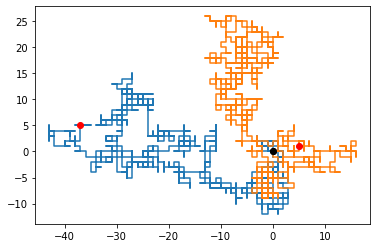

In [4]:
n=1000
p=2
for k in range(p):
    X,Y=Marche1(n)
    plt.plot(X,Y)
    plt.plot(0,0,'o',color='black')
    plt.plot(X[-1],Y[-1],'o',color='red')
    plt.axis('equal')

## Deuxième exemple: une marche aléatoire sur $\mathbb{R}^2$

Considérons le cas où à chaque pas, la personne choisit une direction au hasard, et fait un pas (de longueur $1$) dans cette direction. Si $\Theta \sim \mathcal{U}(0,2\pi)$, un pas sera donné par $(X,Y)$ tel que  $X= \cos\Theta$
et $Y=\sin \Theta$.

In [5]:
def Pas2():
    theta=2*pi*rd.random()
    return cos(theta),sin(theta)

Après $n$ pas ?

In [6]:
def Marche2(n):
    X,Y=[0],[0]
    for i in range(n):
        x,y=Pas2()
        X.append(X[-1]+x),Y.append(Y[-1]+y)
    return X,Y

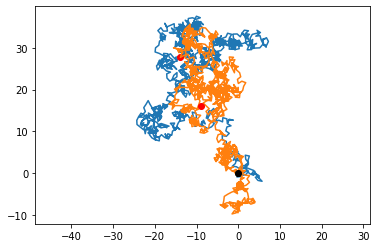

In [7]:
n=1000
p=2
for k in range(p):
    X,Y=Marche2(n)
    plt.plot(X,Y)
    plt.plot(0,0,'o',color='black')
    plt.plot(X[-1],Y[-1],'o',color='red')
    plt.axis('equal')

## Comparaison des deux marches aléatoires

Avec $n=100\,000$ pas, pouvez-vous faire la différence entre les deux marches?

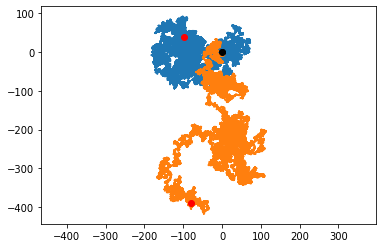

In [8]:
n=100000
X,Y=Marche1(n)
plt.plot(X,Y)
plt.plot(0,0,'o',color='black')
plt.plot(X[-1],Y[-1],'o',color='red')
X,Y=Marche2(n)
plt.plot(X,Y)
plt.plot(0,0,'o',color='black')
plt.plot(X[-1],Y[-1],'o',color='red')
plt.axis('equal')
plt.show()

### Représentation dynamique: voir l'évolution de la marche en fonction du nombre de pas

In [9]:
def Dessin(n):
    x,y=X[:n+1],Y[:n+1]
    plt.plot(x,y)
    plt.plot(0,0,'o',color='black')
    plt.plot(x[n],y[n],'o',color='red')
    plt.axis('equal')
    plt.show()

In [10]:
k=10000
X,Y=Marche1(k)
interact(Dessin,n=(0,k,10))

interactive(children=(IntSlider(value=5000, description='n', max=10000, step=10), Output()), _dom_classes=('wi…

<function __main__.Dessin(n)>

In [11]:
k=10000
X,Y=Marche2(k)
interact(Dessin,n=(0,k,10))

interactive(children=(IntSlider(value=5000, description='n', max=10000, step=10), Output()), _dom_classes=('wi…

<function __main__.Dessin(n)>